In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import NearestNeighbors
from scipy.misc import imread
import random
import time
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/xingobar/Downloads/primary_debates_cleaned.csv')

In [3]:
df.head()

Line   Speaker                                               Text     Date  \
0     1  Woodruff  Good evening, and thank you. We are happy to w...  2/11/16   
1     2     Ifill  We want to also extend our warm thanks to Milw...  2/11/16   
2     3  AUDIENCE                                         (APPLAUSE)  2/11/16   
3     4  Woodruff  Welcome, Senator, great to see you. And former...  2/11/16   
4     5  AUDIENCE                                         (APPLAUSE)  2/11/16   

        Party              Location  \
0  Democratic  Milwaukee, Wisconsin   
1  Democratic  Milwaukee, Wisconsin   
2  Democratic  Milwaukee, Wisconsin   
3  Democratic  Milwaukee, Wisconsin   
4  Democratic  Milwaukee, Wisconsin   

                                                 URL  
0  http://www.presidency.ucsb.edu/ws/index.php?pi...  
1  http://www.presidency.ucsb.edu/ws/index.php?pi...  
2  http://www.presidency.ucsb.edu/ws/index.php?pi...  
3  http://www.presidency.ucsb.edu/ws/index.php?pi...  
4  http://www.presidency.ucsb.edu/ws/index.php?pi...

In [75]:
candidates = ['Bush', 'Carson', 'Chafee', 'Christie', 
              'Clinton', 'Cruz', 'Fiorina', 'Gilmore', 
              'Graham', 'Huckabee', 'Jindal', 'Kasich', 
              "O'Malley", 'Pataki', 'Paul', 'Perry', 
              'Rubio', 'Sanders', 'Santorum', 'Trump', 'Walker', 'Webb']
moderators = ['Arrarás', 'Baier', 'Baker', 'Bartiromo', 'Bash', 'Blitzer',
              'Cavuto', 'Cooney', 'Cooper', 'Cordes', 'Cramer', 'Cuomo', 
              'Dickerson', 'Dinan', 'Epperson', 'Garrett', 'Ham', 'Hannity',
              'Harwood', 'Hemmer', 'Hewitt', 'Holt', 'Ifill', 'Kelly', 'Lemon',
              'Levesque', 'Lopez', 'Louis', 'MacCallum', 'Maddow', 'Mcelveen', 
              'Mitchell', 'Muir', "O'Reilly", 'Obradovich', 'Quick', 'Quintanilla',
              'Raddatz', 'Ramos', 'Regan', 'Salinas', 'Santelli', 'Seib', 'Strassel',
              'Tapper', 'Todd', 'Tumulty', 'Wallace', 'Woodruff']
non_speaker = ['AUDIENCE','CANDIDATES','OTHER','QUESTION','UNKNOWN']

mask_path = '/Users/xingobar/Downloads/black-circle-mask-to-fill-compass-outline-2.png'

In [77]:
## convert word color to grey
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

## remove stopwords (high frequency)
def to_word(content):
    letters = re.sub("[^a-zA-Z]", ' ',content)
    words = letters.lower().split()
    stopword = set(stopwords.words('english')) ## stopword is high frequency
    meaningful = [w for w in words if w not in stopword]
    return (" ".join(meaningful))


df_copy = df.copy()
df_copy = df_copy[~ df_copy['Speaker'].isin(non_speaker)]  ## df_copy not exist non_speaker
df_copy.reset_index(drop=True,inplace=True)
## convert content to meaningful content
clear_content = []
for content in df_copy['Text']:
    clear_content.append(to_word(content))

## tfidf frequency
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(clear_content)

## train model
#knn = NearestNeighbors(n_neighbors=10,metric='cosine',algorithm='brute')
#knn_model = knn.fit(features)

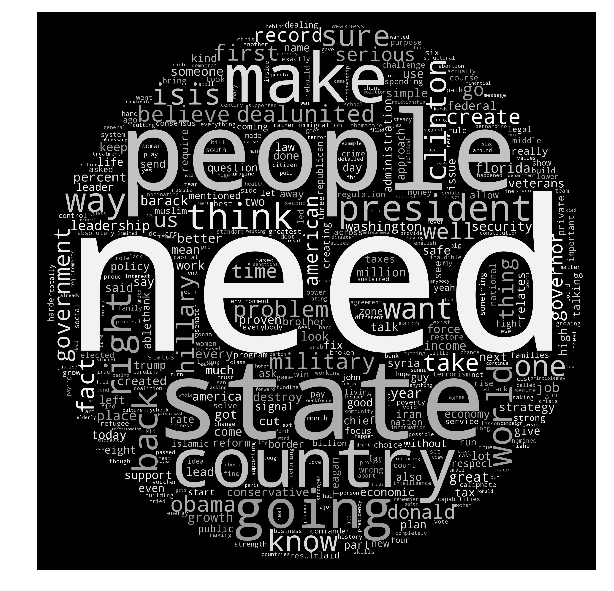

In [81]:
### Bush Text
indexes = []
for i in xrange(len(df_copy)):
    if 'Bush' in df_copy['Speaker'][i]:
        indexes.append(i)

tmp_df = df_copy.iloc[indexes,:]
all_content = ''
for i in tmp_df['Text']:
    all_content = all_content + '  ' + i 

meaningful_word = to_word(all_content)

mask = imread(mask_path)
wordcloud = WordCloud(background_color='black',max_words=500,
                      mask=mask,width=4500,height=3500).generate(meaningful_word)

default_color = wordcloud.to_array()

plt.title('Speaker %s is always featured by the following words' % ('Bush'))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func,random_state=3)) ## custom color
plt.axis('off')
plt.show()

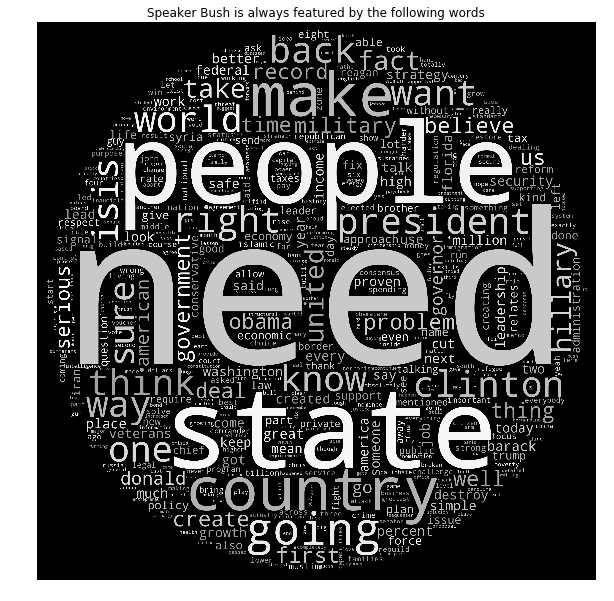

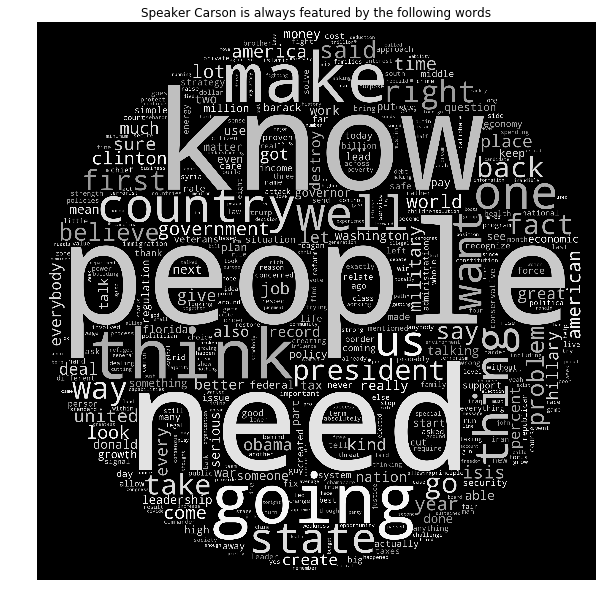

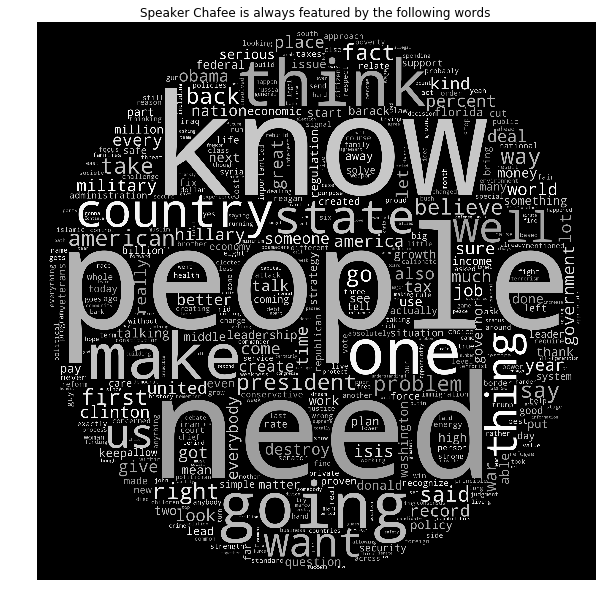

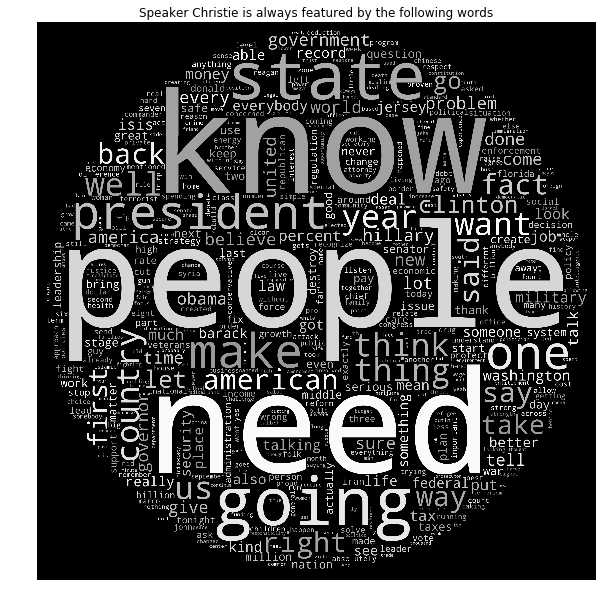

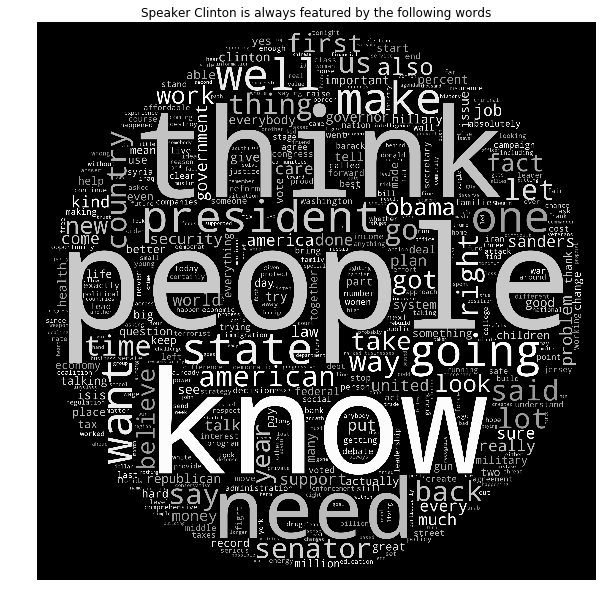

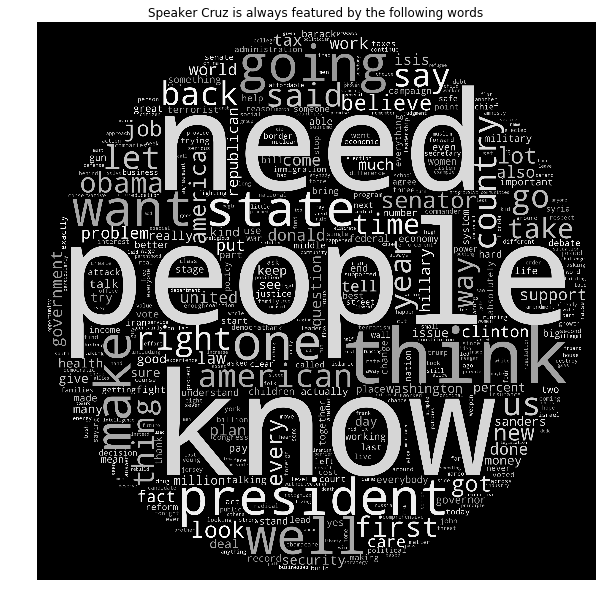

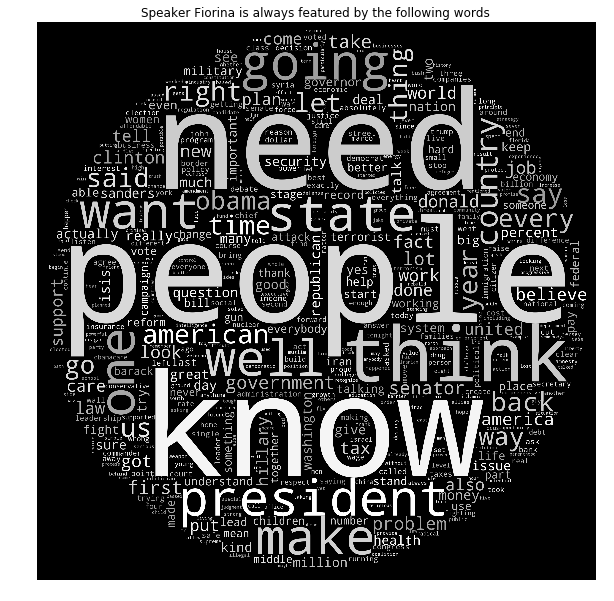

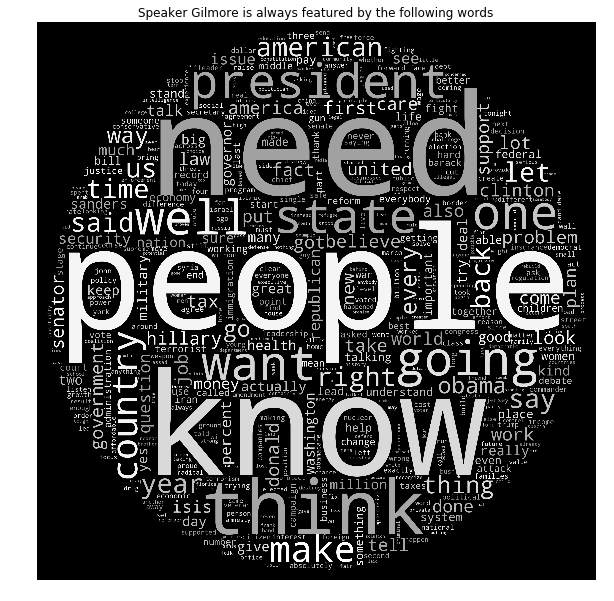

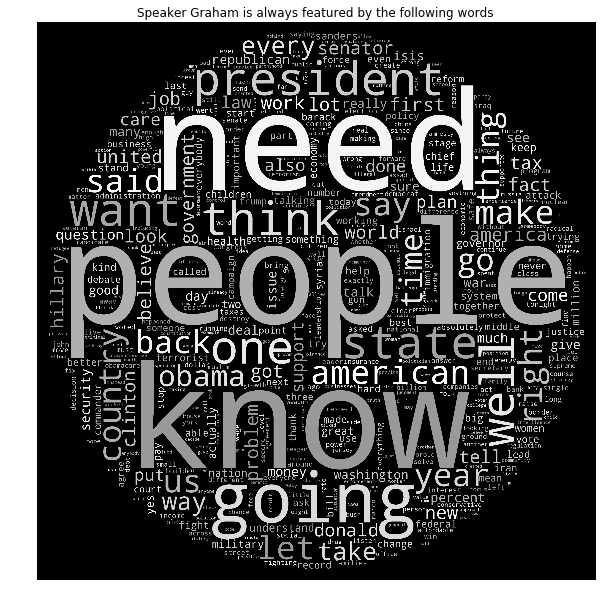

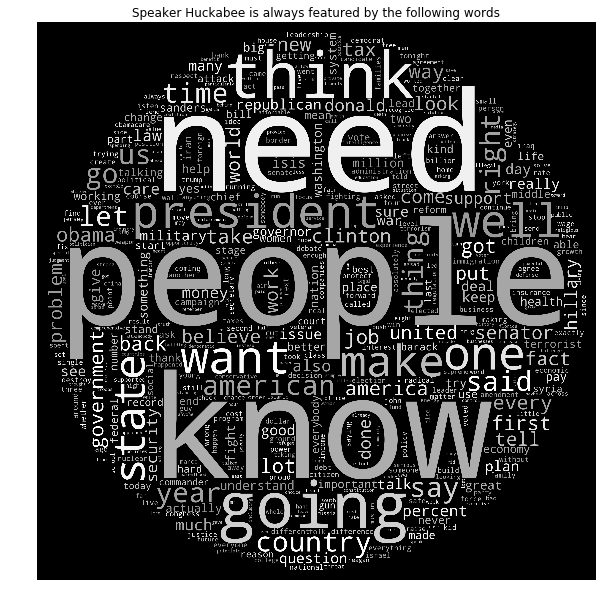

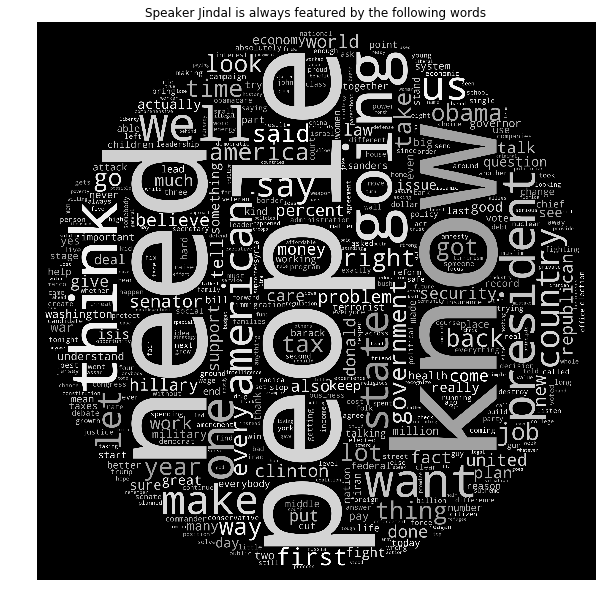

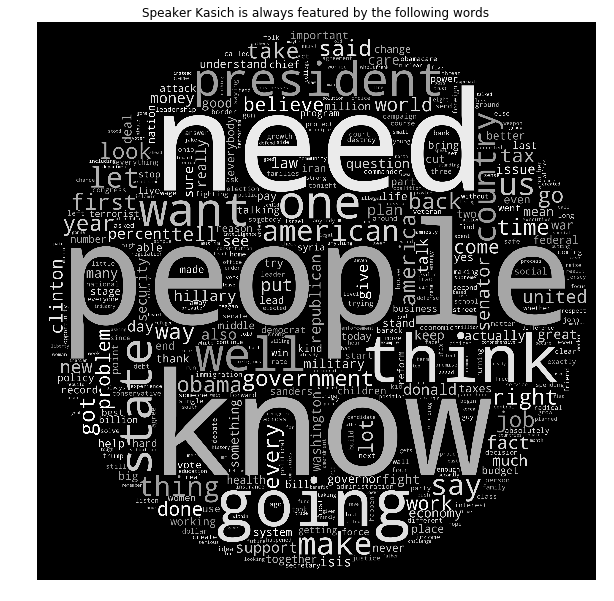

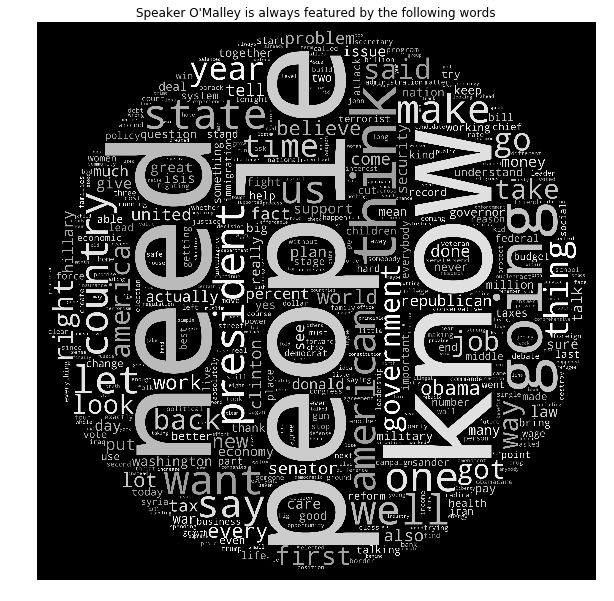

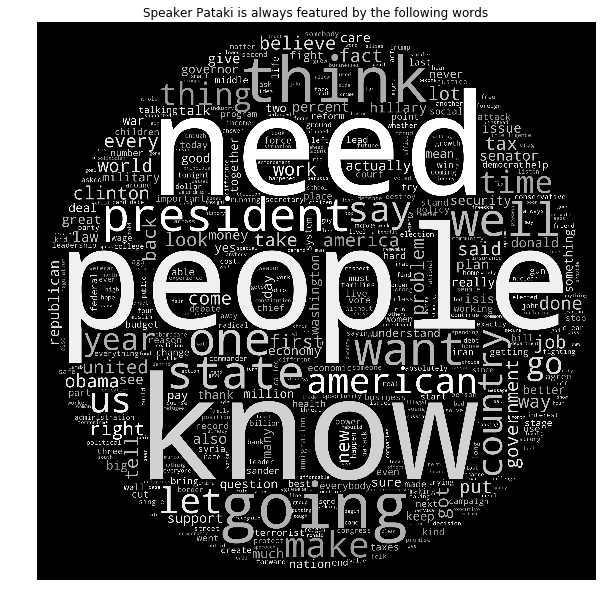

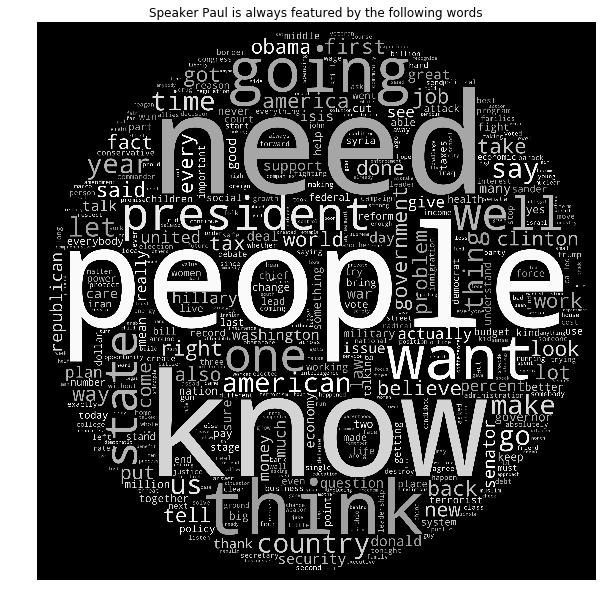

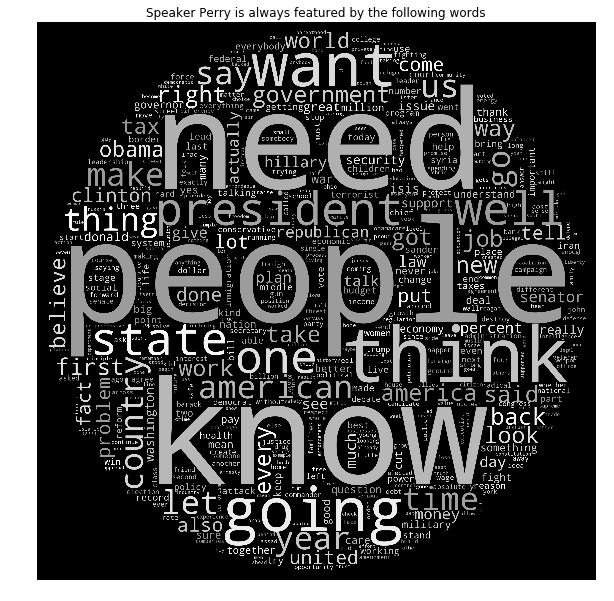

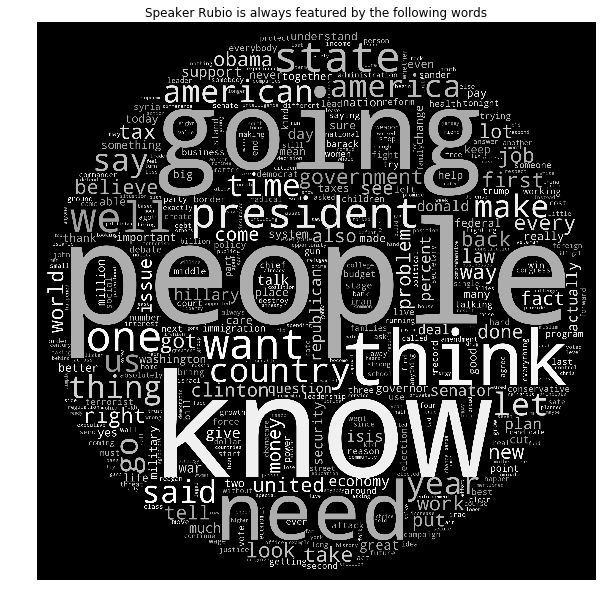

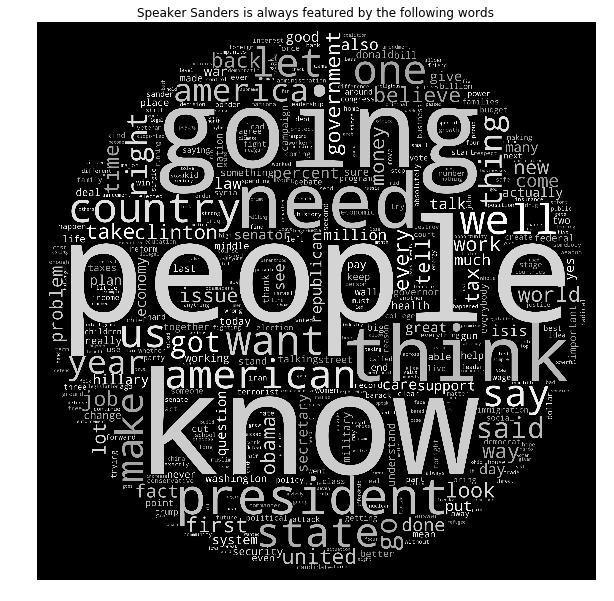

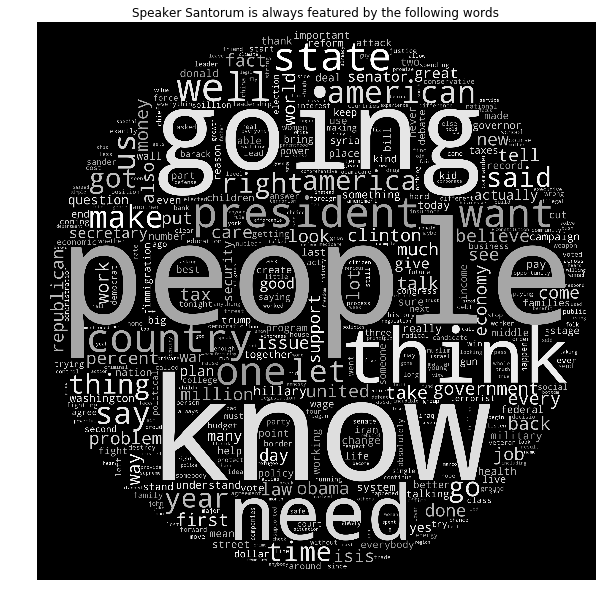

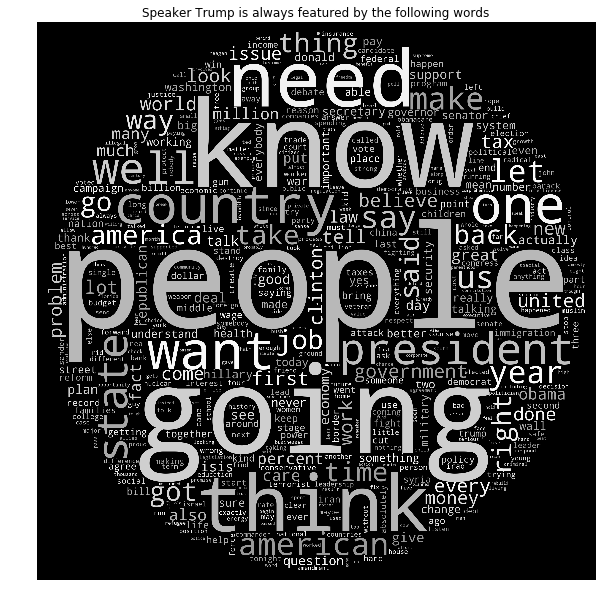

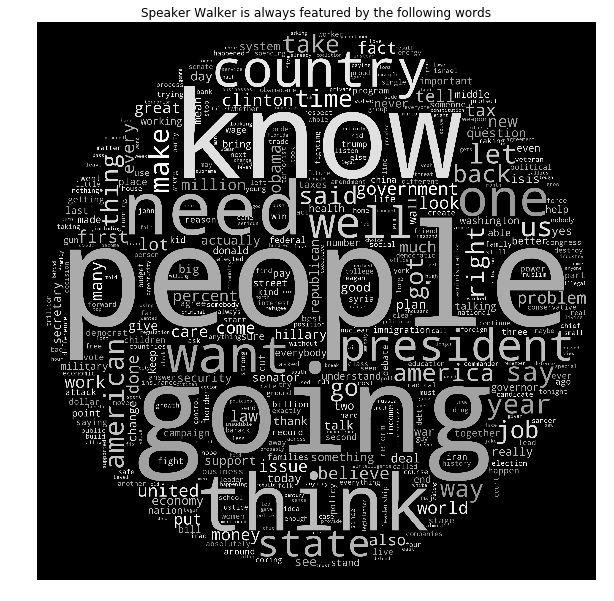

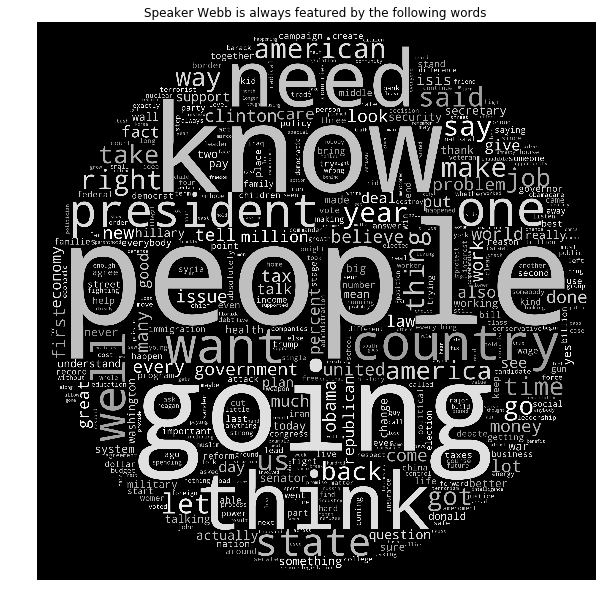

Time is 23.42


In [87]:
## every speaker
indexes = []
mask = imread(mask_path)
start_time = time.time()
for i in candidates:
    plt.figure(figsize=(10,10))
    for j in xrange(len(df_copy)):
        if i in df_copy['Speaker'][j]:
            indexes.append(j)
    tmp_df = df_copy.iloc[indexes,:]
    all_content = ''
    for j in tmp_df['Text']:
        all_content = all_content + '  ' + j 

    meaningful_word = to_word(all_content)

    wordcloud = WordCloud(background_color='black',max_words=500,
                          mask=mask,width=3500,height=3500).generate(meaningful_word)

    default_color = wordcloud.to_array()

    print '==' *30
    plt.title('Speaker %s is always featured by the following words' % (i))
    #plt.figure(figsize=(10,10))
    plt.imshow(wordcloud.recolor(color_func=grey_color_func,random_state=3)) ## custom color
    plt.axis('off')
    plt.show()
    print '==' * 30
end_time = time.time()

print 'Time is %0.2f' % ((end_time - start_time) / 60)